# Simplest Keras

This is an attempt to show the entire workflow of getting data to Keras, training a model, and showing its output.

### Outline:

 1. [create a math function](#1) 
 2. [generate data](#2)
 2. [plot function](#3)
 3. prepare data for Keras
 4. prepare training and validation sets
 5. perpare keras model
 6. train model
 7. graph results

#### 1

In [133]:
import random

In [134]:
def get_data_point(x, jitter):
    preturb = (1 - random.uniform(0, jitter))
    return (x * x) *  preturb

#### 2

In [135]:
total_data_points = 1000

x_data = []
y_data = []

x_min = -10
x_max = 10

# optionally add noise to y output - % as decimal
y_jitter = 0.3

print('Generate ', total_data_points, ' pieces of data')

Generate  1000  pieces of data


In [136]:
for x in range(0, total_data_points):
    rand_x = random.uniform(x_min, x_max)
    x_data.append(rand_x)
    y_data.append(get_data_point(rand_x, y_jitter))

In [137]:
x_data[:5]

[-5.539303786002665,
 -8.104073172662718,
 2.9926107423559074,
 1.092250474783059,
 -8.22920317478096]

In [138]:
y_data[:5]

[24.947217865178796,
 59.63719141877262,
 8.220261805795161,
 0.8425458057648526,
 55.527368354640934]

#### 3

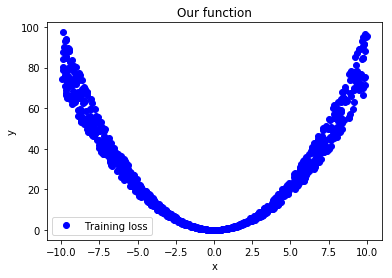

In [139]:
import matplotlib.pyplot as plt # pylint disable=E0401

plt.plot(x_data, y_data, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Our function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

#### 4

In [140]:
import pandas as pd

# maybe not needed

#### 5

In [141]:
x_train = x_data[:800]
y_train = y_data[:800]

x_validation = x_data[800:]
y_validation = y_data[800:]

#### 6

In [142]:
from keras import models
from keras import layers
from keras import backend

backend.clear_session()

model = models.Sequential()

model.add(layers.Dense(100, input_shape=(1,)))
model.add(layers.Dense(20))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='rmsprop',
              loss='mean_squared_error', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


#### 7

In [152]:
from ipywidgets import FloatProgress
from IPython.display import display

f = FloatProgress(min=0, max=total_data_points)
display(f)

# custom callback - not required, just looks nice
from keras import callbacks

class LossHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        print('starting')

    def on_epoch_end(self, batch, logs={}):
        f.value += 1

    def on_train_end(self, logs={}):
        print('finished')

FloatProgress(value=0.0, max=1000.0)

In [151]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=100, 
                    epochs=50,
                    # can disable the next line if desired
                    callbacks=[LossHistory()],
                    validation_data=(x_validation, y_validation))

Train on 800 samples, validate on 200 samples
starting
Epoch 1/50
800/800 [==============================] - 0s 16us/step - loss: 652.3815 - acc: 0.0000e+00 - val_loss: 659.3378 - val_acc: 0.0000e+00
Epoch 2/50
800/800 [==============================] - 0s 17us/step - loss: 649.4772 - acc: 0.0000e+00 - val_loss: 654.6929 - val_acc: 0.0000e+00
Epoch 3/50
800/800 [==============================] - 0s 18us/step - loss: 652.1044 - acc: 0.0000e+00 - val_loss: 648.3616 - val_acc: 0.0000e+00
Epoch 4/50
800/800 [==============================] - 0s 16us/step - loss: 650.3347 - acc: 0.0000e+00 - val_loss: 659.7164 - val_acc: 0.0000e+00
Epoch 5/50
800/800 [==============================] - 0s 16us/step - loss: 650.8487 - acc: 0.0000e+00 - val_loss: 645.4329 - val_acc: 0.0000e+00
Epoch 6/50
800/800 [==============================] - 0s 16us/step - loss: 648.4719 - acc: 0.0000e+00 - val_loss: 676.0424 - val_acc: 0.0000e+00
Epoch 7/50
800/800 [==============================] - 0s 15us/step - loss: 

#### 8

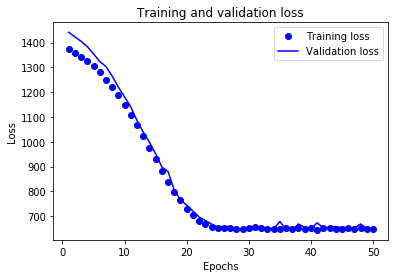

In [145]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

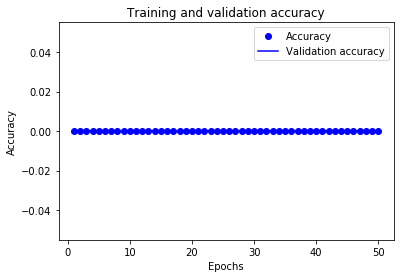

In [146]:
accuracy = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, accuracy, 'bo', label='Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()